<a href="https://colab.research.google.com/github/Joseasd213/Gat-Gos/blob/main/Gato_perro_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.5270 - loss: 0.6964 - val_accuracy: 0.5910 - val_loss: 0.6583
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6486 - loss: 0.6293 - val_accuracy: 0.6330 - val_loss: 0.6492
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.7441 - loss: 0.5200 - val_accuracy: 0.6520 - val_loss: 0.6321
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8045 - loss: 0.4330 - val_accuracy: 0.6790 - val_loss: 0.6417
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.8613 - loss: 0.3380 - val_accuracy: 0.6920 - val_loss: 0.6448


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

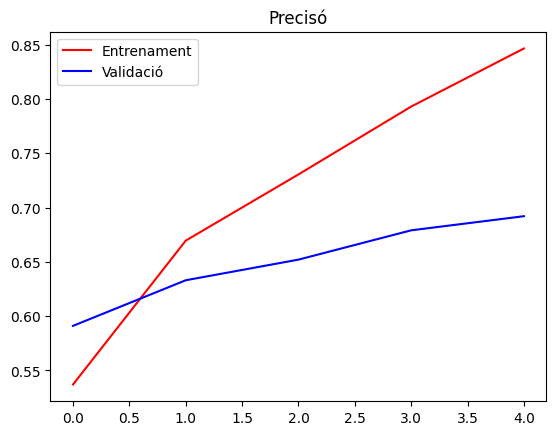

Saving dog.2400.jpg to dog.2400.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
✅ Predicció: GOS (99.06% confiança)
📈 Confiança mitjana anterior per a 'gos': 71.28%
🔍 Aquesta predicció és tan bona o millor que la mitjana.


<ipython-input-16-36d31721a18c>:93: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob = float(prediction[0])


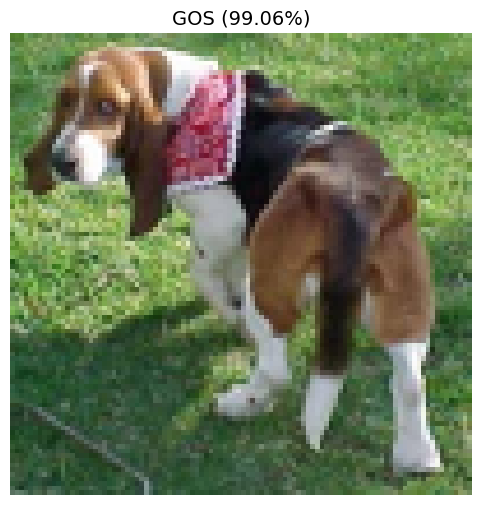

És correcte? (s/n): s
🎉 Bé! La predicció ha estat correcta.

Què vols fer ara?
1️⃣ Afegir una altra imatge
2️⃣ Finalitzar
Escull una opció (1/2): 1


Saving cat.2392.jpg to cat.2392.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Predicció: GAT (95.52% confiança)
📈 Confiança mitjana anterior per a 'gat': 84.97%
🔍 Aquesta predicció és tan bona o millor que la mitjana.


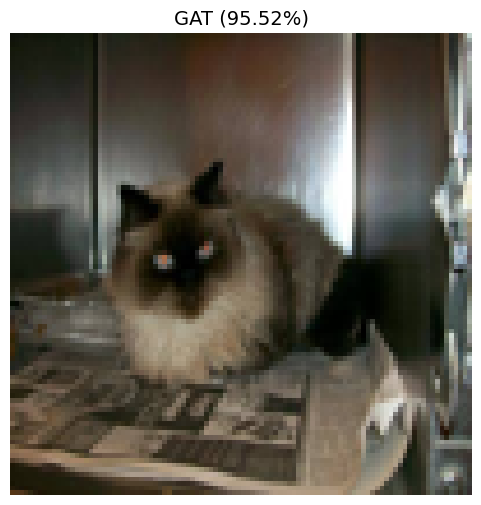

És correcte? (s/n): s
🎉 Bé! La predicció ha estat correcta.

Què vols fer ara?
1️⃣ Afegir una altra imatge
2️⃣ Finalitzar
Escull una opció (1/2): 2
👋 Fi del programa.


In [16]:
# 📦 Imports
import os
import pathlib
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from PIL import Image, UnidentifiedImageError
from google.colab import files
import csv

# 📥 Descarregar i preparar dades
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

base_dir = os.path.join(pathlib.Path(zip_path).parent, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 📊 Preparar generadors d’imatges
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(100, 100), batch_size=10, class_mode='binary'
)
validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(100, 100), batch_size=10, class_mode='binary'
)

# 🧠 Definir i entrenar el model
model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# 💾 Guardar el model
model_json = model.to_json()
with open("model_gats_gossos.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_gats_gossos.weights.h5")
files.download("model_gats_gossos.json")
files.download("model_gats_gossos.weights.h5")

# 📈 Mostrar gràfica
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Entrenament')
plt.plot(epochs, val_acc, 'b', label='Validació')
plt.title('Precisó')
plt.legend()
plt.show()

# 📂 Fitxer historial
historial_file = 'prediccions_historial.csv'
if not os.path.exists(historial_file):
    with open(historial_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['imatge', 'prediccio', 'confiança', 'correcte', 'resultat'])

# 🔄 Carregar model
with open("model_gats_gossos.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_gats_gossos.weights.h5")
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 📸 TEST de predicció manual en bucle
continuar = True
while continuar:
    uploaded = files.upload()
    uploaded_filename = list(uploaded.keys())[0]
    try:
        image = Image.open(uploaded_filename).convert("RGB").resize((100, 100))
        img_array = np.array(image) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = loaded_model.predict(img_array)
        prob = float(prediction[0])
        if prob > 0.5:
            prediccio_text = 'gos'
            conf = prob
        else:
            prediccio_text = 'gat'
            conf = 1 - prob
        print(f"✅ Predicció: {prediccio_text.upper()} ({conf*100:.2f}% confiança)")

        # 📊 Comparar amb historial
        similars = []
        with open(historial_file, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                if row['prediccio'] == prediccio_text:
                    similars.append(float(row['confiança']))
        if similars:
            avg_conf = np.mean(similars)
            print(f"📈 Confiança mitjana anterior per a '{prediccio_text}': {avg_conf*100:.2f}%")
            if conf >= avg_conf:
                print("🔍 Aquesta predicció és tan bona o millor que la mitjana.")
            else:
                print("⚠️ Aquesta predicció té menys confiança que la mitjana de casos similars.")
        else:
            print("ℹ️ No hi ha prou dades similars per comparar.")

        # 📸 Visualitzar imatge
        plt.figure(figsize=(6,6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{prediccio_text.upper()} ({conf*100:.2f}%)", fontsize=14)
        plt.show()

        # 📢 Confirmació usuari
        resposta = input("És correcte? (s/n): ").strip().lower()
        if resposta == 'n':
            correcte = input("Quina és la resposta correcta? (gat/gos): ").strip().lower()
            if correcte in ['gat', 'gos']:
                os.makedirs(f"correccions/{correcte}", exist_ok=True)
                nova_rutaF = f"correccions/{correcte}/{uploaded_filename}"
                os.rename(uploaded_filename, nova_ruta)
                print(f"✅ Imatge desada a {nova_ruta}.")
                resultat = 'error'
            else:
                print("❌ Valor no vàlid.")
                resultat = 'desconegut'
                correcte = 'desconegut'
        else:
            print("🎉 Bé! La predicció ha estat correcta.")
            correcte = prediccio_text
            resultat = 'encert'

        # 📂 Guardar a historial
        with open(historial_file, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([uploaded_filename, prediccio_text, conf, correcte, resultat])

        # 📋 Opcions finals
        print("\nQuè vols fer ara?")
        print("1️⃣ Afegir una altra imatge")
        print("2️⃣ Finalitzar")
        opcio = input("Escull una opció (1/2): ").strip()
        if opcio != '1':
            continuar = False
            print("👋 Fi del programa.")

    except UnidentifiedImageError:
        print("❌ Imatge no vàlida.")
